<a href="https://colab.research.google.com/github/yejikwon7/AI/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# 필요한 라이브러리 불러오기
import torch
import torch.nn as nn # wx: linear 연산으로 수
import torch.optim as optim
import torch.nn.init as init # 값 초기화
from torch.utils.data import DataLoader, TensorDataset

In [20]:
# 데이터 생성
num_data = 3000
num_epoch = 15000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=2) # normal: 정규분포
x = init.uniform_(torch.Tensor(num_data, 1), -20, 20) # 특성 1개 / -20~20 사이에 데이터 3000개 분포
y = (x**3) + (x**2) - x + 6    # 3차 함수
y_noise = y + noise

In [21]:
# 배치 사이즈 설정 및 DataLoader 생성
batch_size = 300
dataset = TensorDataset(x, y_noise)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [22]:
# 모델 생성
# 특성 개수 1 -> 10 -> 20 -> 20 -> 10 -> 1로 변함

model = nn.Sequential(
          nn.Linear(1,10), # wx 연산 수행 -> input node, output node 개수 반드시 필요
          nn.ReLU(),
          nn.Linear(10,20),
          nn.ReLU(),
          nn.Linear(20,20),
          nn.ReLU(),
          nn.Linear(20,10),
          nn.ReLU(),
          nn.Linear(10,1),
          # 출력층: 항등함수
          # 5층 신경망
)

loss_func = nn.L1Loss() # MAE
optimizer = optim.SGD(model.parameters(), lr=0.0005) # 확률적 경사하강법

In [23]:
# 모델 학습
loss_array = []
for i in range(num_epoch):
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad() # 역전파 수행 시 값 제대로 넘어가기 위함
        output = model(batch_x) # mini_batch=300 / 10 iter = 1 epoch
        loss = loss_func(output, batch_y)
        loss.backward() # 역전파: 기울기 계산
        optimizer.step() # 가중치 갱신

    loss_array.append(loss.item()) # epoch돌 때마다의 loss

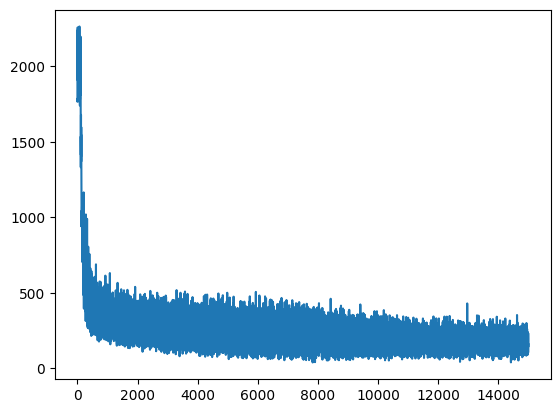

In [24]:
# loss 그래프
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

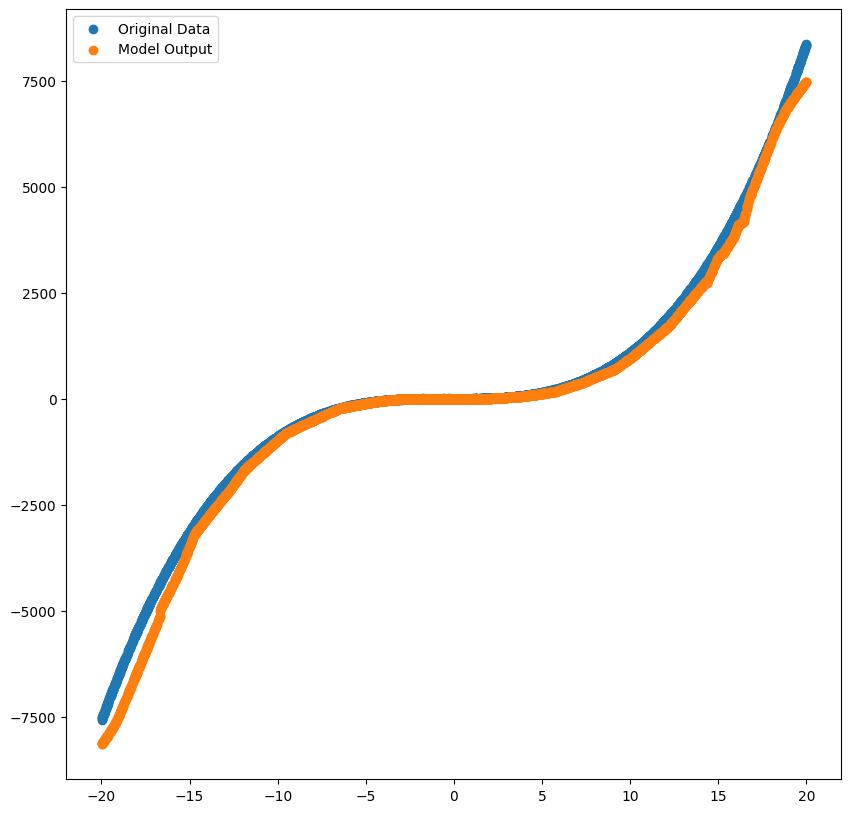

In [25]:
# 모델이 전체 데이터 x에 대해 예측 수행
with torch.no_grad():
    output_full = model(x)  # 전체 x에 대해 예측

# 예측 결과와 원래 데이터 시각화
plt.figure(figsize=(10, 10))
plt.scatter(x.detach().numpy(), y_noise, label="Original Data")  # 정답값
plt.scatter(x.detach().numpy(), output_full.detach().numpy(), label="Model Output")  # 전체 x에 대한 예측 결과
plt.legend()
plt.show()